<a href="https://colab.research.google.com/github/dotmanjohn/kosh/blob/master/Propensity_to_Buy_Term_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Identify Bank Customers with the highest propensity to buy term deposits
The marketing head of the bank where you are a data scientist approaches you with a problem they would like to be addressed. The marketing team recently completed a marketing campaign where they have collated a lot of information on existing customers. They require your help to identify which of these customers are likely to buy a term deposit plan. Based on your assessment of the customer base, the marketing team will chalk out strategies for target marketing. 

The marketing team has provided access to historical data of past campaigns and their outcomes—that is, whether the targeted customers really bought the term deposits or not. Equipped with the historical data, you have set out on the task to identify the customers with the highest propensity (an inclination) to buy term deposits.

In [ ]:
import pandas as pd

In [ ]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'

In [ ]:
# Loading the data using pandas
bankData = pd.read_csv(file_url, sep=";")
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Printing the shape of the data
print(bankData.shape)

(45211, 17)


From the shape of the data, the dataset has 45211 examples with 17 variables.

In [ ]:
# Summarizing the statistics of the numerical raw data
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#Testing Business Hypotheses Using Exploratory Data Analysis

1. Business Hypothesis Testing for Age versus Propensity for a Term Loan: **The propensity to buy term deposits is more with elderly customers compared to younger ones**.

We will be verifying how the purchased term deposits are distributed by age. First we will count the number of records for each age group. We will be using the combination of .groupby().agg().reset_index() methods from pandas.

In [ ]:
filter_mask = bankData['y'] == 'yes'
bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()
bankSub1.head()

,age,agegrp
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


In [ ]:
import altair as alt

In [ ]:
# Visualising the relationship using altair
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

From the plot, we can see that the highest number of term deposit purchases are done by customers within an age range 25 and 40, with the propensity to buy tapering off with age. This relationship is counterintuitive from our assumptions in the hypothesis. This is bevause we are taking the data based on the absolute count of customers in each age range. If the proportion of banking customers is higher within the age range of 25 to 40, then we are very likely to get a plot like the one that we have got. 

However, we can plot the proportion of customers within each age group, who buy a term deposit. Let's look at how we can represent the data by taking the proportion of customers.

In [ ]:
# Grouping the data per age and finding the total number of customers under each age group using the agg() method
ageTot = bankData.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [ ]:
# Grouping the data by both age and propensity of purchase and finding the total counts under each category of propensity, which are yes and no
ageProp = bankData.groupby(['age','y'])['y'].agg(ageCat='count').reset_index()
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


Get the proportion of customers for each age group by merging both dataframes based on the age variable, and then divide each category of propensity within each age group by the total customers in the respective age group

In [ ]:
ageComb = pd.merge(ageProp, ageTot,left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


Display the proportion plot for both categories (yes and no) as separate plots. This can be achieved through a method within altair called facet()

In [ ]:
# Visualising the relationship using altair
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

As we can see from these two graphs, the left graph shows the proportion of people who do not buy term deposits and the right one shows those customers who buy term deposits.

We can see, in the first graph, with the age group beginning from 22 to 60, individuals would not be inclined to purchase the term deposit. However, in the second graph, we see the opposite, where the age group of 60 and over are much more inclined to purchase the term deposit plan.

This supports our hypothesis that "the propensity to buy term deposits is more with the elderly customers compared to the younger ones".

We can also see another interesting fact which is the higher proportion of term deposit purchases for ages younger than 20.

2. Business Hypothesis Testing for Employment Status versus Propensity for Term Deposits: **High paying employees prefer term deposits more than other categories of employees**.

In [ ]:
!pip install dfply
!pip install ggplot

In [ ]:
from dfply import *
from ggplot import *

In [ ]:
# Grouping the data by employment status and finding the total customers that bought term deposits in each job group
filter_mask = bankData['y'] == 'yes'
bankSub2 = bankData[filter_mask].groupby('job')['y'].agg(jobgrp='count').reset_index()

In [ ]:
# Visualising the relationship using altair
alt.Chart(bankSub2).mark_line().encode(x='job', y='jobgrp')

alt.Chart(...)

From the plot, we can see that the highest number of term deposit purchases are done by the management customers, with entrepreneurs and housemaids having the least numbers. This relationship supports our assumptions in the hypothesis. This is because we are taking the data based on the absolute count of customers in each job group. If the proportion of management customers is high, then we are very likely to get a plot like the one that we have got. 

However, we can plot the proportion of customers within each job group, who buy a term deposit. Let's look at how we can represent the data by taking the proportion of customers.

In [ ]:
# Grouping the data per job and finding the total number of customers under each job group using the agg() method
jobTot = bankData.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot.head()

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458


In [ ]:
# Grouping the data by both job and propensity of purchase and finding the total counts under each category of propensity, which are yes and no
jobProp = bankData.groupby(['job','y'])['y'].agg(jobCat='count').reset_index()
jobProp.head()

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364


Get the proportion of customers for each job group by merging both dataframes based on the job group, and then divide each category of propensity within each job group by the total customers in the respective job group

In [ ]:
# Merging both the data frames
jobComb = pd.merge(jobProp, jobTot,left_on = ['job'], right_on = ['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100
jobComb.head()

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312


Display the proportion plot for job groups by propensity categories (yes and no) as single plot using matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

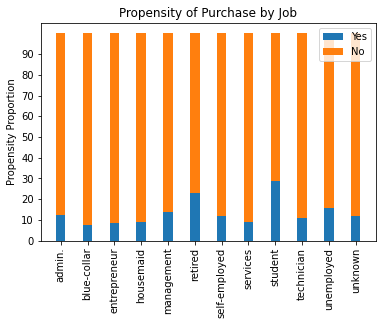

In [ ]:
# Create separate DataFrames for yes and no:
jobcombYes = jobComb[jobComb['y'] == 'yes']
jobcombNo = jobComb[jobComb['y'] == 'no']

# Get the length of x axis labels and arranging its indexes
xlabels = len(list(jobTot['job']))
ind = np.arange(xlabels)

#Get the proportion values:
jobYes = list(jobcombYes['catProp'])
jobNo = list(jobcombNo['catProp'])

# Get width of each bar
width = 0.35

# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom=jobYes)

# Getting the labels for the plots 
plt.ylabel('Propensity Proportion')
plt.title('Propensity of Purchase by Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, list(jobTot['job']))
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels
plt.xticks(rotation=90)
plt.show()

From this plot, we can see that the hypothesis that we formulated was wrong. In our hypothesis, we stated that individuals with higher incomes are more likely to buy term deposits. However, from the exploration, we have found out that students and retired individuals have a higher propensity for term deposits.

Also, surprisingly, unemployed customers have a higher propensity than some employed customers

In [ ]:
# Relationship between housing and propensity for term deposits
bankData.groupby(['housing', 'y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


3. From the values above, we can see that **the propensity to buy term deposits is much higher for people who do not own a house compared with those who do own one**: ( 3354 / ( 3354 + 16727) = 17% to 1935 / ( 1935 + 23195) = 8%).

In [ ]:
# Relationship between having a loan and propensity for term deposits
bankData.groupby(['loan', 'y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


4. In the case of loan portfolios, **the propensity to buy term deposits is higher for customers without loans**: ( 4805 / ( 4805 + 33162) = 12 % to 484/ ( 484 + 6760) = 6%).

Housing and loans are categorical data, however, bank balance data is numerical and to analyze it, we need to have a different strategy. One common strategy is to convert the continuous numerical data into ordinal data and look at how the propensity varies across each category.

To convert numerical values into ordinal values, we first find the quantile values and take them as threshold values.

In [ ]:
#Taking the quantiles for 25%, 50% and 75% of the balance data
import numpy as np
np.quantile(bankData['balance'],[0.25,0.5,0.75])

array([  72.,  448., 1428.])

In [ ]:
bankData['balanceClass'] = 'Quant1'
bankData.loc[(bankData['balance'] > 72) & (bankData['balance'] < 448), 'balanceClass'] = 'Quant2'
bankData.loc[(bankData['balance'] > 448) & (bankData['balance'] < 1428), 'balanceClass'] = 'Quant3'
bankData.loc[bankData['balance'] > 1428, 'balanceClass'] = 'Quant4'
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1


From the above step, all values lower than the 25th quantile value, 72, were classified as Quant1, values between 72 and 448 were classified as Quant2, and so on. To store the quantile categories, we created a new feature in the bank dataset called balanceClass and set its default value to Quan1. After this, based on each value threshold, the data points were classified to the respective quantile class.

In [ ]:
# Calculating the customers under each quantile
balanceTot = bankData.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [ ]:
# Calculating the total customers categorised as per quantile and propensity classification
balanceProp = bankData.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [ ]:
# Merging both dataframes and calculating the proportion of propensity for each quantile
balanceComb = pd.merge(balanceProp, balanceTot, on = ['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot)*100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


5. From the distribution of data, we can see that, as we move from Quantile 1 to Quantile 4, the proportion of customers who buy term deposits keeps on increasing. With this trend, we can conclude that **individuals with higher balances have more propensity for term deposits**.

The overall trend that we can observe is that people with more cash in hand (no loans and a higher balance) have a higher propensity to buy term deposits.

#Feature Engineering – Creating New Features from Existing Ones
In the case of the bank balance dataset, which contains numerical values, we need to first normalize the data. The purpose of normalization is to bring all of the variables that we are using to create the new feature into a common scale.

In [ ]:
# Normalizing data
from sklearn import preprocessing
x = bankData[['balance']].values.astype(float)

In [ ]:
minmaxScaler = preprocessing.MinMaxScaler()
bankData['balanceTran'] = minmaxScaler.fit_transform(x)
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072812


In [ ]:
# Adding a small numerical constant to eliminate 0 values
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

The purpose of adding this small value is to avoid the variable values becoming 0 during the multiplying operation in the subsequent steps, we will be multiplying three transformed variables together to form a composite index.

In [ ]:
# Let us transform values for loan data
bankData['loanTran'] = 1
# Giving a weight of 5 if there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072822,5


We transformed values for the loan data as per the weighting approach. When a customer has a loan, it is given a weight of 1, and when there's no loan, the weight assigned is 5. The value of 1 and 5 are intuitive weights we are assigning.

In [ ]:
# Let us transform values for Housing data
bankData['houseTran'] = 5
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072822,5,1


Weight 1 is assigned if customer has a house, remember that customers with a house are less likely to purchase a term deposit.

In [ ]:
# Let us now create the new variable which is a product of all the transformed variables
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran']
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072822,5,1,0.364112


In [ ]:
# Finding the quantile
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.37668646, 0.56920367, 1.9027249 ])

In [ ]:
bankData['assetClass'] = 'Quant1'
bankData.loc[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'
bankData.loc[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'
bankData.loc[bankData['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'
bankData.head()
bankData.assetClass[bankData['assetIndex'] > 1.9] = 'Quant4'
bankData.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072822,5,1,0.364112,Quant1


In [ ]:
# Calculating total of each asset class
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = bankData.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [ ]:
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10921,12212,89.428431
1,Quant1,yes,1291,12212,10.571569
2,Quant2,no,8436,10400,81.115385
3,Quant2,yes,1964,10400,18.884615
4,Quant3,no,10144,11121,91.214819
5,Quant3,yes,977,11121,8.785181
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


From the new feature we created, we can see that 18.88% (we get this percentage from catProp) of customers who are in Quant2 have bought term deposits compared to 10.57 % for Quant1, 8.78% for Quant3, and 9.28% for Quant4. Since Quant2 has the highest proportion of customers who have bought term deposits, we can conclude that customers in Quant2 have higher propensity to purchase the term deposits than all other customers.

#Model Iteration 1 – Logistic Regression Model for Predicting the Propensity of Term Deposit Purchases in a Bank

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
bankData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# Converting all the categorical variables to dummy variables
bankCat = pd.get_dummies(bankData[['job','marital','education','default','housing','loan','contact','month','poutcome']])
bankCat.shape

(45211, 44)

In [ ]:
bankNum = bankData[['age','balance','day','duration','campaign','pdays','previous']]
bankNum.shape

(45211, 7)

In [ ]:
# Preparing the X variables
X = pd.concat([bankCat, bankNum], axis=1)
print(X.shape)
# Preparing the Y variable
Y = bankData['y']
print(Y.shape)
X.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,58,2143,5,261,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,44,29,5,151,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,2,5,76,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,47,1506,5,92,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,33,1,5,198,1,-1,0


In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [ ]:
bankModel = LogisticRegression()
bankModel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.89


In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)

[[11754   244]
 [ 1242   324]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     11998
         yes       0.57      0.21      0.30      1566

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



From the metrics, we can see that, out of the total 11,998 examples of no, 11,754 were correctly classified as no and the balance, 244, were classified as yes. This gives a recall value of 11,754/11,998, which is nearly 98%. From a precision perspective, out of the total 12,996 examples that were predicted as no, only 11,754 of them were really no, which takes our precision to 11,754/12,996 or 90%.

However, the metrics for yes give a different picture. Out of the total 1,566 cases of yes, only 324 were correctly identified as yes. This gives us a recall of 324/1,566 = 21%. The precision is 324 / (324 + 244) = 57%.

From an overall accuracy level, this can be calculated as follows: correctly classified examples / total examples = (11754 + 324) / 13564 = 89%.

The metrics might seem good when you look only at the accuracy level. However, looking at the details, we can see that the classifier, in fact, is doing a poor job of classifying the yes cases. The classifier has been trained to predict mostly no values, which from a business perspective is useless. From a business perspective, we predominantly want the yes estimates, so that we can target those cases for focused marketing to try to sell term deposits. However, **with the results we have, we don't seem to have done a good job in helping the business to increase revenue from term deposit sales.**

#Model Iteration 2 – Logistic Regression Model with Feature Engineered Variables

In [ ]:
# Converting all the categorical variables to dummy variables
bankCat1 = pd.get_dummies(bankData[['job','marital','education','default','contact','month','poutcome']])
bankCat1.shape

(45211, 40)

In [ ]:
bankNum1 = bankData[['age','day','duration','campaign','pdays','previous','assetIndex']]
bankNum1.shape
bankNum1.head()

,age,day,duration,campaign,pdays,previous,assetIndex
0,58,5,261,1,-1,0,2.306734
1,44,5,151,1,-1,0,1.826916
2,33,5,76,1,-1,0,0.364158
3,47,5,92,1,-1,0,2.162153
4,33,5,198,1,-1,0,0.364112


In [ ]:
# Normalizing numerical data with different scales
from sklearn import preprocessing
ageT = bankNum1[['age']].values.astype(float)
dayT = bankNum1[['day']].values.astype(float)
durT = bankNum1[['duration']].values.astype(float)

In [ ]:
minmaxScaler = preprocessing.MinMaxScaler()
bankNum1['ageTran'] = minmaxScaler.fit_transform(ageT)
bankNum1['dayTran'] = minmaxScaler.fit_transform(dayT)
bankNum1['durTran'] = minmaxScaler.fit_transform(durT)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
bankNum2 = bankNum1[['ageTran','dayTran','durTran','campaign','pdays','previous','assetIndex']]
bankNum2.head()

,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0.519481,0.133333,0.053070,1,-1,0,2.306734
1,0.337662,0.133333,0.030704,1,-1,0,1.826916
2,0.194805,0.133333,0.015453,1,-1,0,0.364158
3,0.376623,0.133333,0.018707,1,-1,0,2.162153
4,0.194805,0.133333,0.040260,1,-1,0,0.364112


In [ ]:
# Preparing the X variables
X1 = pd.concat([bankCat1, bankNum2], axis=1)
print(X1.shape)
# Preparing the Y variable
Y1 = bankData['y']
print(Y1.shape)
X1.head()

(45211, 47)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.519481,0.133333,0.053070,1,-1,0,2.306734
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.337662,0.133333,0.030704,1,-1,0,1.826916
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.194805,0.133333,0.015453,1,-1,0,0.364158
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.376623,0.133333,0.018707,1,-1,0,2.162153
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.194805,0.133333,0.040260,1,-1,0,0.364112


In [ ]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Defining the LogisticRegression function
bankModel1 = LogisticRegression()
bankModel1.fit(X1_train, y1_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred1 = bankModel1.predict(X1_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(bankModel1.score(X1_test, y1_test)))

Accuracy of Logistic regression model prediction on test set: 0.89


In [ ]:
# Here is the confusion matrix for the model:

from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y1_test, pred1)
print(confusionMatrix)

[[11758   240]
 [ 1198   368]]


In [ ]:
# Here are the metrics for the feature engineered model:

from sklearn.metrics import classification_report
print(classification_report(y1_test, pred1))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     11998
         yes       0.61      0.23      0.34      1566

    accuracy                           0.89     13564
   macro avg       0.76      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



From the feature engineered variables, we can see that there is an improvement in the no cases, we can observe that more no cases were correctly classified from what was there before. However, it has also resulted in the degradation of the yes cases. The features that were created have not given us the results that we really want. Ideally, we would have wanted to improve the metrics for the yes cases.

From the metrics, we see that the model that we built does a good job of identifying the no class, but does a very poor job of correctly identifying the yes class.

In [ ]:
# Generating the percentages of the classes in the training data:

print('Percentage of negative class :',(y_train[y_train=='yes'].value_counts()/len(y_train) ) * 100)
print('Percentage of positive class :',(y_train[y_train=='no'].value_counts()/len(y_train) ) * 100)

Percentage of negative class : yes    11.764148
Name: y, dtype: float64
Percentage of positive class : no    88.235852
Name: y, dtype: float64


From this, we can see that the majority of the training set (88%) is made up of the no class. This imbalance is one of the major reasons behind the poor metrics that we have had with the logistic regression classifier we have selected, this imbalance has resulted in a bias towards the majority class.

This can be fixed by doing a resampling (undersample) of the majority class (propensity 'No') and then make the dataset balanced. On the new balanced dataset, we will fit a logistic regression model and then analyze the results

#Implementing Random Undersampling and Classification on Our Banking Dataset to Find the Optimal Result
Now, to break the dataset down further, let's perform some feature-engineering steps, we will normalize the numerical features (age, balance, and duration) through scaling, which was covered earlier.

In [ ]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In the preceding code snippet, we used a scaling function called RobustScaler() to scale the numerical data. RobustScaler() is a scaling function similar to MinMaxScaler.

After scaling the numerical data, we will convert each of the columns to a scaled version, as follows

In [ ]:
# Converting each of the columns to scaled version
bankData['ageScaled'] = rob_scaler.fit_transform(bankData['age'].values.reshape(-1,1))
bankData['balScaled'] = rob_scaler.fit_transform(bankData['balance'].values.reshape(-1,1))
bankData['durScaled'] = rob_scaler.fit_transform(bankData['duration'].values.reshape(-1,1))

Now we will drop the original features after we introduce the scaled features using the .drop() function:

In [ ]:
# Dropping the original columns
bankData.drop(['age','balance','duration'], axis=1, inplace=True)
bankData.head()

,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,ageScaled,balScaled,durScaled
0,management,married,tertiary,no,yes,no,unknown,5,may,1,-1,0,unknown,no,1.266667,1.250000,0.375000
1,technician,single,secondary,no,yes,no,unknown,5,may,1,-1,0,unknown,no,0.333333,-0.308997,-0.134259
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,1,-1,0,unknown,no,-0.400000,-0.328909,-0.481481
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,1,-1,0,unknown,no,0.533333,0.780236,-0.407407
4,unknown,single,unknown,no,no,no,unknown,5,may,1,-1,0,unknown,no,-0.400000,-0.329646,0.083333


The categorical features in the dataset have to be converted into numerical values by transforming them into dummy values, which was covered in Chapter 3, Binary Classification.

Convert all the categorical variables to dummy variables using the .get_dummies() function:

In [ ]:
bankCat2 = pd.get_dummies(bankData[['job','marital','education','default','housing','loan','contact','month','poutcome']])

In [ ]:
# Separate the numerical data as in the following code snippet:
bankNum3 = bankData[['ageScaled','balScaled','day','durScaled','campaign','pdays','previous']]

After the categorical values are transformed, they must be combined with the scaled numerical values of the data frame to get the feature-engineered dataset.

Create the independent variables, X, and dependent variables, Y, from the combined dataset for modeling, as in the following code snippet:

In [ ]:
# Preparing the X variables
X2 = pd.concat([bankCat2, bankNum3], axis=1)
print(X2.shape)
# Preparing the Y variable
Y2 = bankData['y']
print(Y2.shape)
X2.head()

(45211, 51)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.266667,1.250000,5,0.375000,1,-1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.333333,-0.308997,5,-0.134259,1,-1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.400000,-0.328909,5,-0.481481,1,-1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.533333,0.780236,5,-0.407407,1,-1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.400000,-0.329646,5,0.083333,1,-1,0


We are now ready for the modeling task. Let's first import the necessary packages.

In [ ]:
# Now, import the necessary functions of train_test_split() and LogisticRegression from sklearn:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Split the data into train and test sets at a 70:30 ratio using the test_size = 0.3 variable in the splitting function. We also set random_state for the reproducibility of the code:

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=123)

# Defining the LogisticRegression function
bankModel2 = LogisticRegression()

In [ ]:
# Let us first join the X2_train and y2_train for ease of operation
trainData = pd.concat([X2_train,y2_train],axis=1)

In this step, we concatenated the X2_train and y2_train datasets to one single dataset. This is done to make the resampling process in the subsequent steps easier. To concatenate the two datasets, we use the .concat() function from pandas. In the code, we use axis = 1 to indicate that the concatenation is done horizontally, which is along the columns.

In [ ]:
# Displaying the new data with the .head() function:
trainData.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
19100,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.800000,-0.162979,5,0.236111,1,-1,0,no
37958,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.733333,-0.238938,14,0.865741,2,289,19,no
12451,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000000,0.385693,1,1.347222,3,-1,0,no
18263,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.333333,-0.330383,31,-0.592593,8,-1,0,no
5128,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.466667,-0.142330,21,-0.435185,2,-1,0,no


What we will do next is separate the minority class and the majority class. This is required because we have to sample separately from the majority class to make a balanced dataset. To separate the minority class, we have to identify the indexes of the dataset where the dataset has 'yes.' The indexes are identified using .index() function.

Once those indexes are identified, they are separated from the main dataset using the .loc() function and stored in a new variable for the minority class. The shape of the minority dataset is also printed. A similar process is followed for the majority class and, after these two steps, we have two datasets: one for the minority class and one for the majority class.

In [ ]:
# Next, find the indexes of the sample dataset where the propensity is yes:
ind = trainData[trainData['y']=='yes'].index
print(len(ind))

3723


In [ ]:
# Separating the minority class as in the following code snippet:
minData = trainData.loc[ind]
print(minData.shape)

(3723, 52)


In [ ]:
# Now, find the indexes of the majority class:
ind1 = trainData[trainData['y']=='no'].index
print(len(ind1))

27924


In [ ]:
# Separating the majority class as in the following code snippet:
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

(27924, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
19100,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.800000,-0.162979,5,0.236111,1,-1,0,no
37958,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.733333,-0.238938,14,0.865741,2,289,19,no
12451,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000000,0.385693,1,1.347222,3,-1,0,no
18263,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.333333,-0.330383,31,-0.592593,8,-1,0,no
5128,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.466667,-0.142330,21,-0.435185,2,-1,0,no


In [ ]:
# Take a random sample equal to the length of the minority class to make the dataset balanced: Extract the samples using the .sample() function:
majSample = majData.sample(n=len(ind),random_state = 123)

In [ ]:
# Now that sampling is done, the shape of the majority class dataset and its head is printed:
print(majSample.shape)
majSample.head()

(3723, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
17387,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.666667,0.752212,28,-0.425926,3,-1,0,no
34679,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.800000,0.086283,5,-0.106481,7,250,3,no
26572,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.466667,1.785398,20,-0.134259,2,-1,0,no
3280,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.200000,1.972714,15,-0.009259,1,-1,0,no
4434,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.133333,2.011062,20,-0.055556,1,-1,0,no


In [ ]:
# After preparing the individual dataset, we can now concatenate them together using the pd.concat() function:
# Concatenating both data sets and then shuffling the data set
balData = pd.concat([minData,majSample],axis = 0)

Note: In this case, we are concatenating in the vertical direction and, therefore, axis = 0 is used.

Now, shuffle the dataset so that both the minority and majority classes are evenly distributed using the shuffle() function:

In [ ]:
# Shuffling the data set
from sklearn.utils import shuffle
balData = shuffle(balData)
balData.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ageScaled,balScaled,day,durScaled,campaign,pdays,previous,y
44798,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,-0.066667,0.758850,15,0.949074,3,769,2,yes
32639,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.133333,0.414454,17,-0.615741,1,338,1,no
9002,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1.333333,2.575221,5,-0.611111,2,-1,0,no
37219,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.066667,1.349558,13,0.296296,1,-1,0,no
44977,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-0.800000,-0.075221,11,0.148148,1,-1,0,yes


Now, separate the shuffled dataset into the independent variables, X_trainNew, and dependent variables, y_trainNew. The separation is to be done using the index features 0 to 51 for the dependent variables using the .iloc() function in pandas. The dependent variables are separated by sub-setting with the column name 'y':

In [ ]:
# Making the new X_train and y_train
X_trainNew = balData.iloc[:,0:51]
print(X_trainNew.head())

y_trainNew = balData['y']
print(y_trainNew.head())

       job_admin.  job_blue-collar  job_entrepreneur  ...  campaign  pdays  previous
44798           0                0                 0  ...         3    769         2
32639           1                0                 0  ...         1    338         1
9002            0                0                 0  ...         2     -1         0
37219           0                0                 0  ...         1     -1         0
44977           1                0                 0  ...         1     -1         0

[5 rows x 51 columns]
44798    yes
32639     no
9002      no
37219     no
44977    yes
Name: y, dtype: object


Now we fit the model on the new data and generate the confusion matrix and classification report for our analysis.

First, define the LogisticRegression function with the following code snippet:

In [ ]:
from sklearn.linear_model import LogisticRegression
bankModel3 = LogisticRegression()
bankModel3.fit(X_trainNew, y_trainNew)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Next, perform the prediction on the test with the following code snippet:
pred2 = bankModel3.predict(X2_test)
print('Accuracy of Logistic regression model prediction on test set for balanced data set: {:.2f}'.format(bankModel3.score(X2_test, y2_test)))

Accuracy of Logistic regression model prediction on test set for balanced data set: 0.83


{:.2f}'.format is used to print the string values along with the accuracy score, which is output from bankModel3.score(X2_test, y2_test). In this, 2f means a numerical score with two decimals.

Now, generate the confusion matrix for the model and print the results:

In [ ]:
from sklearn.metrics import confusion_matrix
confusionMatrix2 = confusion_matrix(y2_test, pred2)
print(confusionMatrix2)
from sklearn.metrics import classification_report
print(classification_report(y2_test, pred2))

[[9969 2029]
 [ 278 1288]]
              precision    recall  f1-score   support

          no       0.97      0.83      0.90     11998
         yes       0.39      0.82      0.53      1566

    accuracy                           0.83     13564
   macro avg       0.68      0.83      0.71     13564
weighted avg       0.91      0.83      0.85     13564



Now, by balancing the dataset, we have seen that the recall for the minority class has improved tremendously, from a low of 0.21 to around 0.82. This means that by balancing the dataset, the classifier has improved its ability to identify yes cases.

However, our overall accuracy has reduced from around 89% to around 83%. One major area where accuracy has taken a hit is the number of false positives, which are those No cases that were wrongly predicted as Yes.

Analyzing the result from a business perspective, this is a much better scenario than the one we got in the benchmark model. In the benchmark model, out of the total 1,566 'Yes' cases, only 324 were correctly identified. After balancing, we were able to identify 1,288 out of 1,566 customers from the dataset who were likely to buy term deposits, which can potentially result in a better conversion rate. However, the flip side of this is that the sales team will also have to spend a lot of time on customers who are unlikely to buy term deposits. From the confusion matrix, we can see that false negatives have gone up to 2,029 from the earlier 244 we got in the benchmark model.

#CONCLUSION

We can deduce from the exploratory data analysis we carried out that certain groups of customers are more likely to buy term deposits, such as; 

The elderly, those who have not taken loan, those with higher balances, customers who do not own a house are more likely to buy a term deposit and finally income level does not determine if an employee will buy term deposit.